<a href="https://colab.research.google.com/github/zszazi/MSD/blob/master/template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Matching

## upload images 

I had some problem with navigating through image in google colab 
so I locally downloaded few images and tried template matching on it

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving crop.jpg to crop.jpg
Saving image.jpg to image.jpg
User uploaded file "crop.jpg" with length 9974 bytes
User uploaded file "image.jpg" with length 74579 bytes


## Import required libraries

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

 # **make sure to rename uploaded image and crop file and multicrop**

-----------------------IMAGE-----------------------


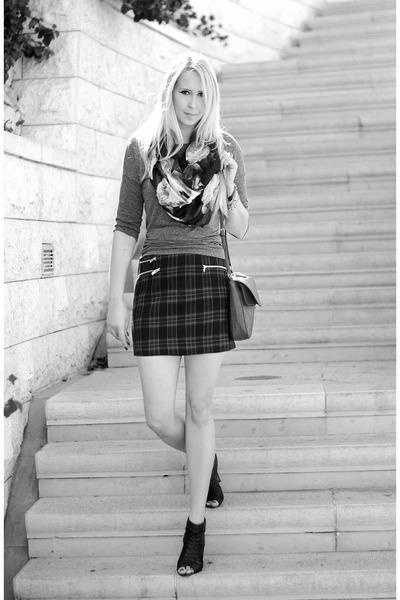


-----------------------TEMPLATE-----------------------


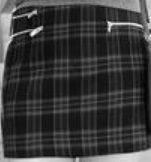

In [7]:
img = cv2.imread('image.jpg',0)
img2 = img.copy()
template = cv2.imread('crop.jpg',0)
w, h = template.shape[::-1]

print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE-----------------------')
cv2_imshow(template)




# There are total 6 inbuilt methods for template matching



**1.   TM_CCOEFF**

**2.   TM_CCOEFF_NORMED**

**3.   TM_CCORR**

**4.   TM_CCORR_NORMED**

**5.   TM_SQDIFF**

**6.   TM_SQDIFF_NORMED**



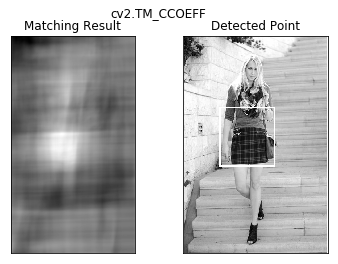

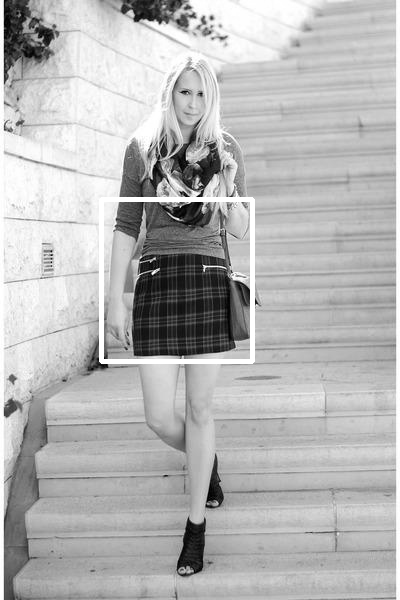

-24615556.0 28876666.0 (11, 1) (101, 199)
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs


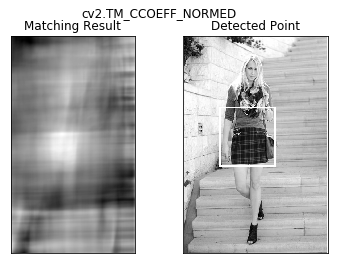

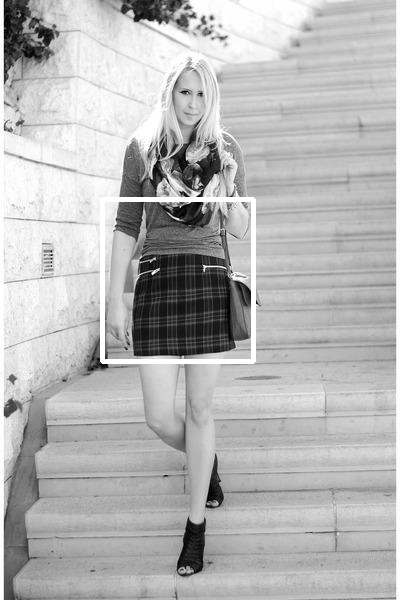

-0.4136885702610016 0.3770569860935211 (37, 12) (102, 199)
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


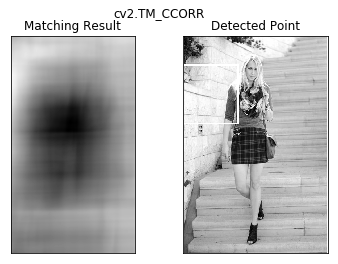

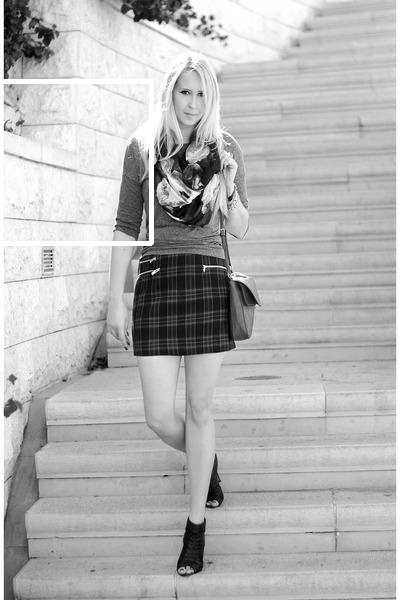

158274400.0 303128192.0 (116, 190) (0, 81)
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs


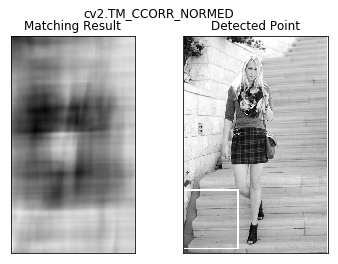

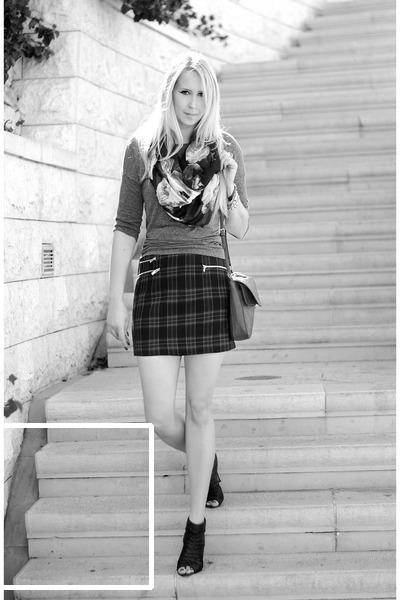

0.6673038005828857 0.8097569942474365 (50, 193) (0, 425)
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.63 µs


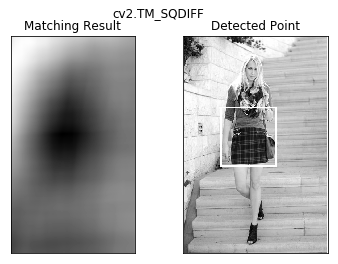

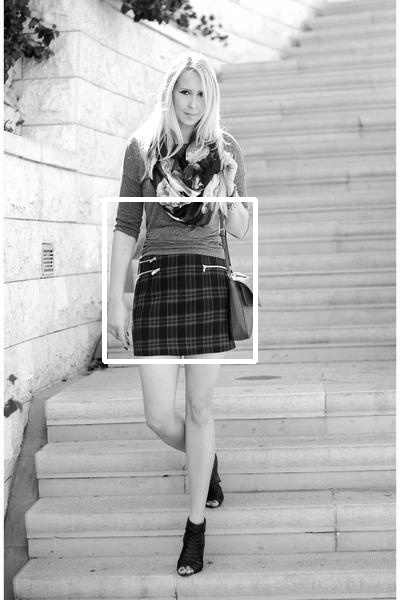

168978704.0 763961984.0 (104, 199) (0, 54)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


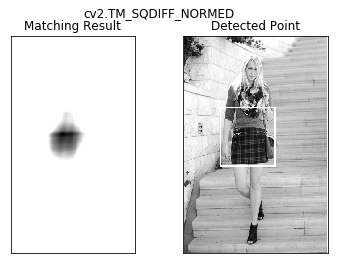

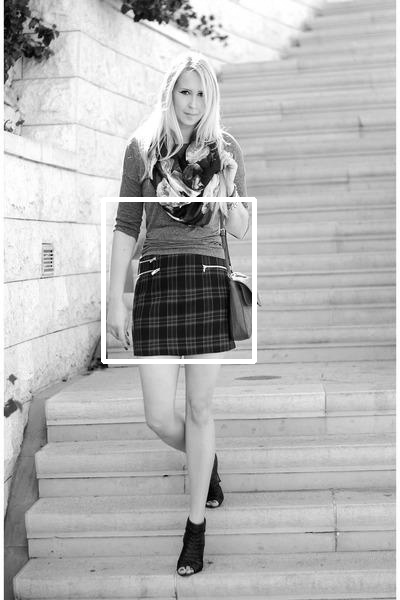

0.7565264701843262 1.0 (103, 199) (0, 0)
CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.9 µs


In [9]:

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 4)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()
    
    cv2_imshow(img)
    
    # PRINT The Coordinates
    print(min_val,max_val,min_loc,max_loc)
    %%time
    

# Incase if the crop is not found in the image

In [11]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving crop_not_found.jpg to crop_not_found.jpg
User uploaded file "crop_not_found.jpg" with length 146799 bytes


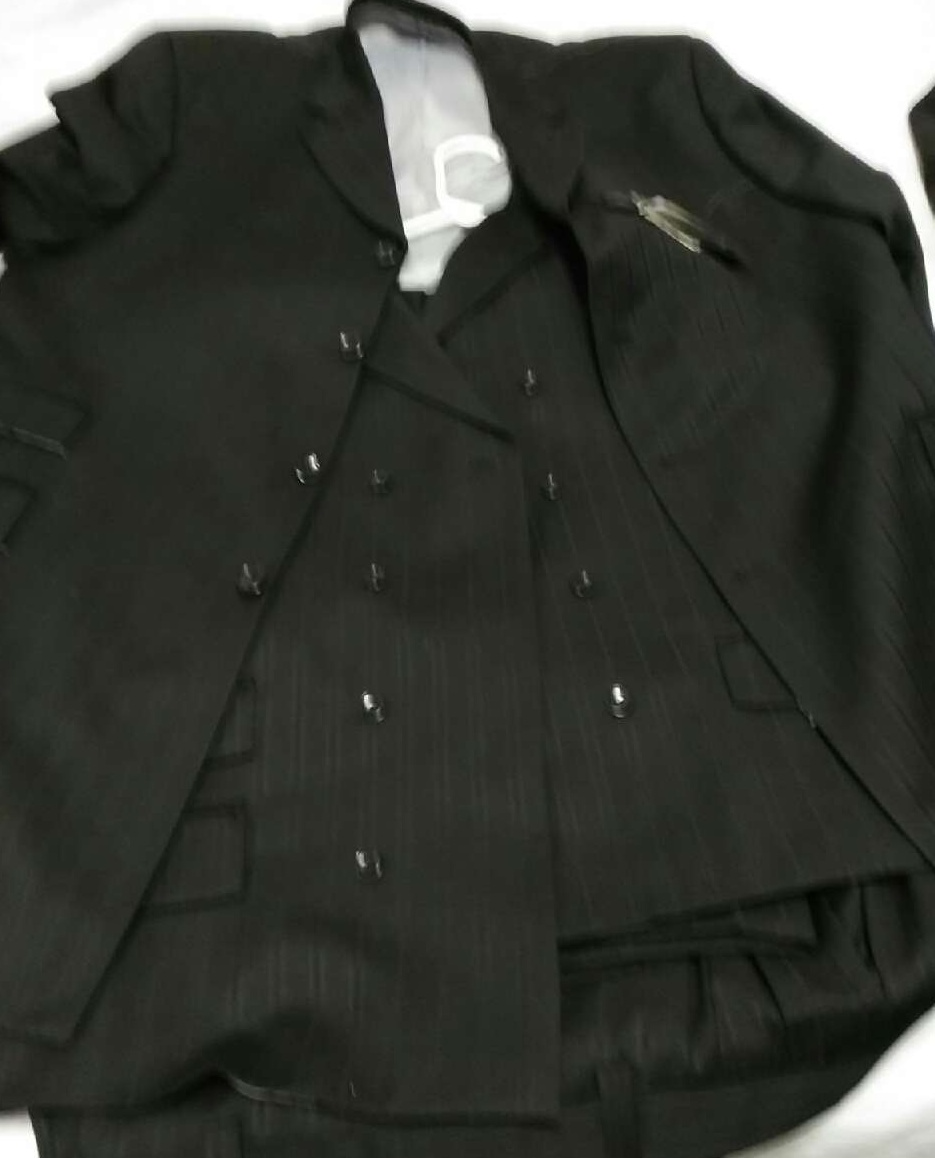

In [12]:
img_nocrop = cv2.imread('crop_not_found.jpg')

cv2_imshow(img_nocrop)

In [0]:
img = cv2.imread('image.jpg',0)
img2 = img.copy()
template = cv2.imread('crop_not_found.jpg',0)
w, h = template.shape[::-1]



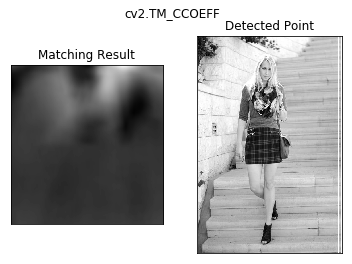

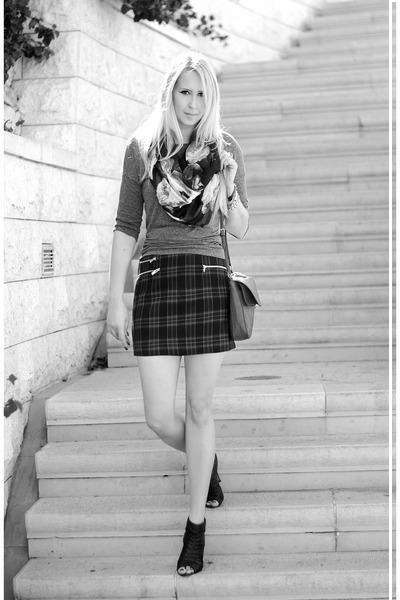

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 6.2 µs


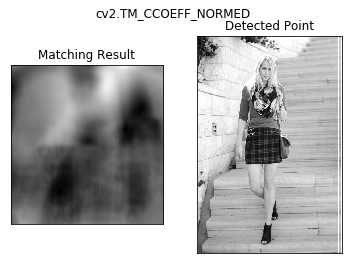

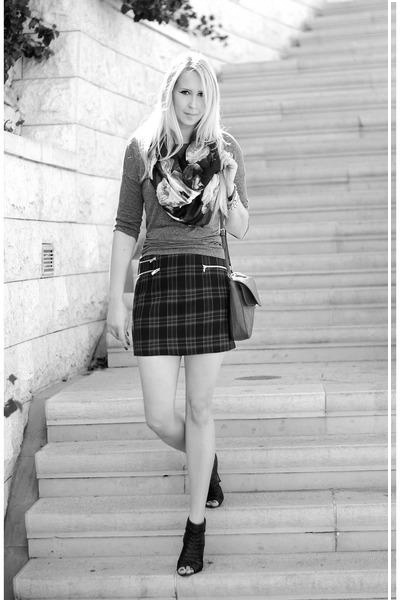

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 10 µs


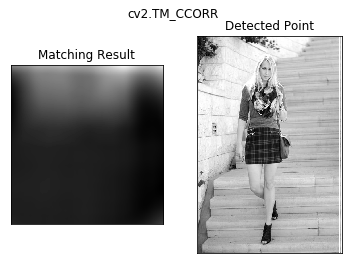

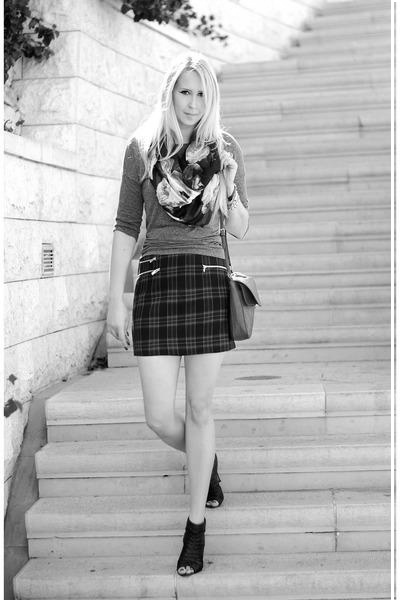

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


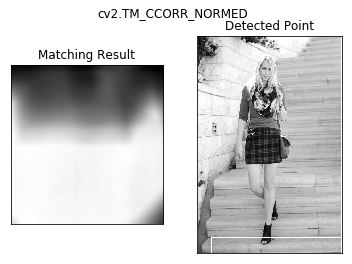

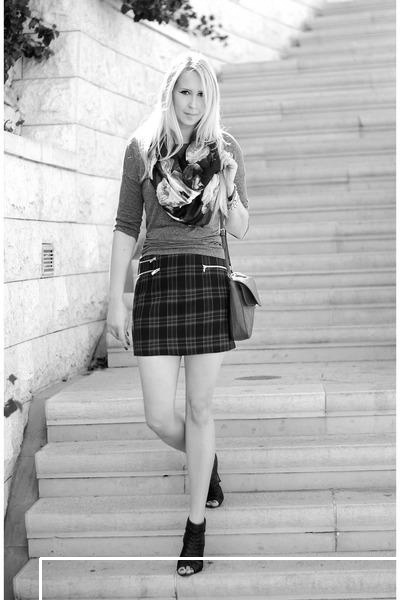

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


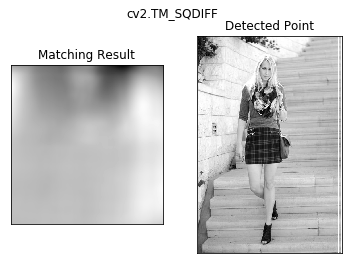

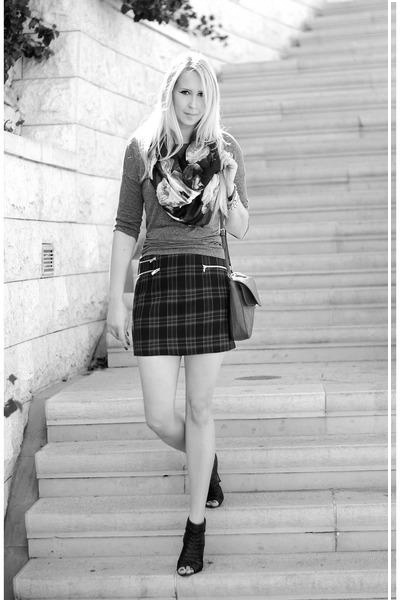

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


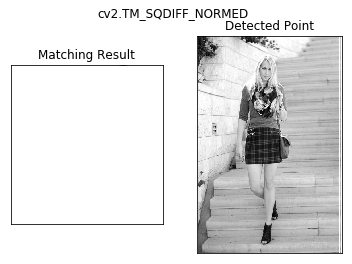

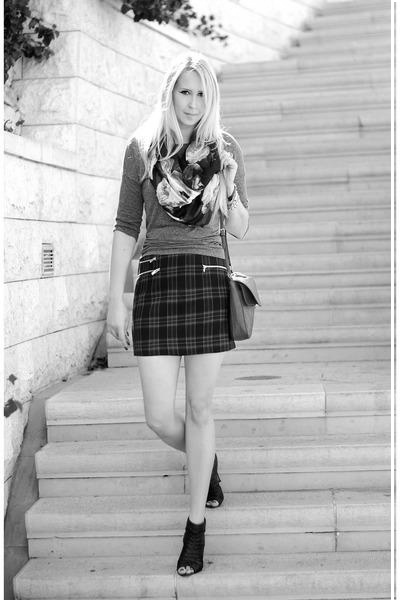

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 7.15 µs


In [14]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()
    
    cv2_imshow(img)
    # for knowing how long did it took to run each template matching algo
    %%time
    
    

# In case of multiple match results

In [15]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving multi_crop.jpg to multi_crop.jpg
User uploaded file "multi_crop.jpg" with length 1098 bytes


### Multi template matching crop image

In [16]:
img_mul = cv2.imread('multi_crop.jpg')

cv2_imshow(img_mul)

print("We will search for this pattern in the image")

We will search for this pattern in the image


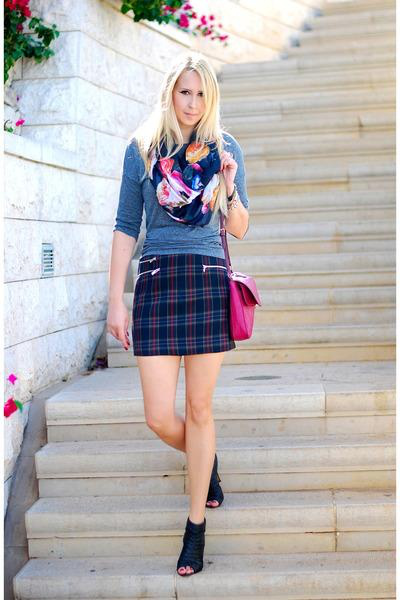

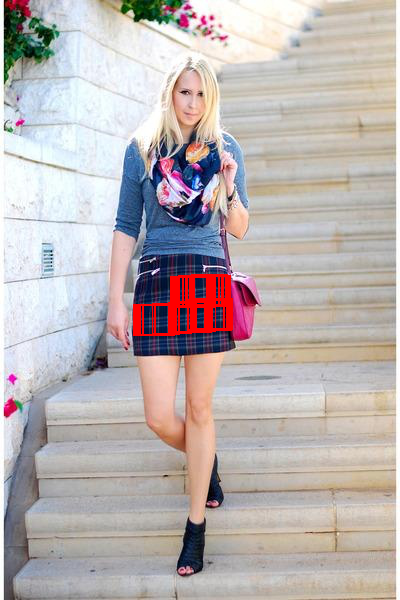

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


In [17]:
# read image using google colab upload widget
img = cv2.imread('image11.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('multi_crop.jpg',0)

# run template matching, get minimum val
res = cv2.matchTemplate(gray, template, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# create threshold from min val
#also fins the location where sqdiff is less than thresh
min_thresh = (min_val)*1.1
match_locations = np.where(res<=min_thresh)

# draw template match boxes as the multi template is too small so the template boxes are 
# overlapping each other

w, h = template.shape[::-1]
for (x, y) in zip(match_locations[1], match_locations[0]):
    cv2.rectangle(img, (x, y), (x+w, y+h), [0,0,255], 1)
    

# display result cv2.imshow() not supported on google colab so i used cv2_imshow()
cv2_imshow(img)
%time


